In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("C:\\Users\\Sukhmeetkour\\OneDrive\\Documents\\Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.drop(['PassengerId','Name',"Ticket","Cabin"],
        axis = 1,
        inplace = True)

In [10]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [12]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [13]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [14]:
df.select_dtypes(include='object').columns

Index(['Sex', 'Embarked'], dtype='object')

In [15]:
from sklearn.preprocessing import LabelEncoder
enc_sex = LabelEncoder()
enc_emb = LabelEncoder()

df['Sex'] = enc_sex.fit_transform(df['Sex'])
df['Embarked'] = enc_emb.fit_transform(df['Embarked'])


In [16]:
import pickle

In [17]:
with open('sex_encoder.pkl','wb') as f:
    pickle.dump(enc_sex,f)

In [18]:
with open('emb_encoder.pkl','wb') as f:
    pickle.dump(enc_sex,f)

In [19]:

#Gender encoding Male --> 1 Female --> 0 Embarke encoding S --> 2 C --> 0 Q --> 1

In [20]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [21]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [22]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [23]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [24]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test  = train_test_split(x,
                                                  y,
                                                  test_size=0.3)

In [25]:
x_train.shape,y_train.shape

((623, 7), (623,))

In [26]:
x_test.shape,y_test.shape

((268, 7), (268,))

In [27]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [28]:
y_pred = log_model.predict(x_test)
y_pred[:10]

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0])

In [29]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report,f1_score

In [30]:
print(f"AccuracyScore {accuracy_score(y_test,y_pred)*100}%")
print(f"Precision Score {precision_score(y_test,y_pred)*100}%")
print(f"Recall Score {recall_score(y_test,y_pred)*100}%")
print(f"F1 Score {f1_score(y_test,y_pred)*100}%")

AccuracyScore 78.35820895522389%
Precision Score 74.50980392156863%
Recall Score 70.37037037037037%
F1 Score 72.38095238095238%


In [31]:
confusion_matrix(y_test,y_pred)

array([[134,  26],
       [ 32,  76]])

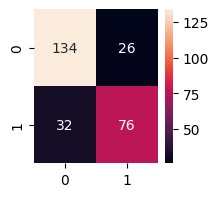

In [32]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(2,2))
sns.heatmap(cm,annot=True,fmt = ".0f")
plt.show()

In [33]:
# New Prediction 
arr = np.array([[0,	1,	43,	2,	0,	9.2500,	1]])
pred = log_model.predict(arr)
pred

array([0])

In [34]:
Total_data = 142 + 29+ 28+  69
True_value = 142 + 69
accuracy = (True_value/Total_data)*100
print(accuracy)
print(100-accuracy)

78.73134328358209
21.268656716417908


In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       160
           1       0.75      0.70      0.72       108

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



KNN Algorithm

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [37]:
knn_pred = knn.predict(x_test)
knn_pred[:10]

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [38]:
accuracy_score(y_test,knn_pred)*100

68.65671641791045

In [41]:
confusion_matrix(y_test,knn_pred)

array([[131,  29],
       [ 55,  53]])

In [42]:
plt.figure(fig)
sns.heatmap(confusion_matrix(y_test,knn_pred),annot = True)

NameError: name 'fig' is not defined

Support Vector Machines

In [40]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear')
svm.fit(x_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [ ]:
svm_pred = svm.predict(x_test)
svm_pred[:20]